In [1]:
%load_ext autoreload
%autoreload 2
from utils_final import *

## Бенчмарк симуляции


In [2]:
rho = np.array([[1.00,  0.10,  0.45,  0.64 * np.sqrt(32.00)],
                [0.10,  1.00, -0.35, -0.24 * np.sqrt(32.00)],
                [0.45, -0.35,  1.00,  0.14 * np.sqrt(32.00)],
                [0.64 * np.sqrt(32.00), -0.24 * np.sqrt(32.00),  0.14 * np.sqrt(32.00), 32.00]])

r = 0.9
betas = np.array([1, 1, 1])
gammas = np.array([[3.3, 0.0, 0.0], 
                   [1.0, 1.0, 0.0],
                   [1.0, 0.0, 1.0]]).T

In [3]:
set_seed(999)

res0 = run_simulations(200, rho, r, betas, gammas, n_simulations=100)
res0

  0%|          | 0/100 [00:00<?, ?it/s]

2023-04-09 09:15:21.152345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,2.383005e+00,4.068036e-01,1.383005e+02,1.193930,0.028464,21.228085,1.112649,0.029826,17.023105
1,DMF,8.523174e-01,1.311954e+00,9.172173e+01,0.992633,0.042585,17.016080,0.975833,0.039211,16.047433
2,Boosting,3.943154e+04,1.537951e+11,3.946785e+06,1.047587,0.042006,17.347251,1.018690,0.037610,15.896215
3,RandomForest,4.125859e+01,7.830782e+04,5.053113e+03,1.034625,0.040184,16.798771,1.022773,0.033239,14.932528
4,Fully-Connected NN,1.438966e+06,1.339609e+14,9.524697e+08,1.024568,0.041084,16.824064,1.017126,0.033654,15.061543


In [4]:
set_seed(999)

res1 = run_simulations(1000, rho, r, betas, gammas, n_simulations=100)
res1

  0%|          | 0/100 [00:00<?, ?it/s]

,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,2.434454,7.484975e-02,1.434454e+02,1.196847,0.005762,19.715796,1.126985,0.008178,13.462725
1,DMF,0.932976,3.386691e-01,4.594381e+01,0.995367,0.010113,7.734012,1.000388,0.013095,9.384525
2,Boosting,-24.152670,8.029355e+04,3.892816e+03,1.029761,0.008993,7.862481,1.023492,0.011431,8.901964
3,RandomForest,16.410308,1.460280e+04,3.293998e+03,1.034870,0.009726,8.220887,1.030097,0.012161,9.115510
4,Fully-Connected NN,-690790.591366,2.865759e+13,4.298534e+08,1.017804,0.010222,7.890378,1.025514,0.012603,9.191044


In [6]:
set_seed(999)

res2 = run_simulations(10000, rho, r, betas, gammas, n_simulations=100)
res2

  0%|          | 0/100 [00:00<?, ?it/s]

,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,2.409080,6.925555e-03,1.409080e+02,1.198729,0.000550,19.872941,1.116287,0.000704,11.628665
1,DMF,0.855334,2.996309e-02,1.870178e+01,0.995666,0.000982,2.536784,0.982024,0.001054,2.992472
2,Boosting,3.132515,1.168348e+02,7.445968e+02,1.008279,0.000854,2.429772,0.997715,0.001167,2.664713
3,RandomForest,10.323206,1.899323e+03,2.656068e+03,1.026849,0.000921,3.259856,1.010055,0.000914,2.566907
4,Fully-Connected NN,-283983.644170,2.427350e+12,1.238345e+08,1.007746,0.000990,2.580503,0.999219,0.001248,2.757875


## Мисспецификация линейного индекса в уравнении отбора 

In [7]:
rho = np.array([[1.00,  0.10,  0.45,  0.64 * np.sqrt(32.00)],
                [0.10,  1.00, -0.35, -0.24 * np.sqrt(32.00)],
                [0.45, -0.35,  1.00,  0.14 * np.sqrt(32.00)],
                [0.64 * np.sqrt(32.00), -0.24 * np.sqrt(32.00),  0.14 * np.sqrt(32.00), 32.00]])

r = 0.9
betas = np.array([1, 1, 1])
gammas = np.array([[3.3, 0.0, 0.0, 0.3, 0.0, 0.0], 
                   [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                   [1.0, 0.1, 0.0, 0.0, 0.0, 1.0]]).T

In [8]:
set_seed(999)

res0p = run_simulations(200, rho, r, betas, gammas, n_simulations=100, regime='polinom')
res0p

  0%|          | 0/100 [00:00<?, ?it/s]

,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,1.932887,3.552895e-01,9.991832e+01,1.100493,0.048571,19.665922,1.025595,0.028309,13.461468
1,DMF,0.279808,6.300464e+00,1.915229e+02,0.977272,0.078296,21.681544,1.020572,0.059120,19.644214
2,Boosting,5143.087639,4.605373e+09,8.279517e+05,1.026220,0.054284,18.790858,0.973400,0.039026,15.001291
3,RandomForest,-1132.743015,1.504509e+08,1.426433e+05,1.008434,0.056580,19.882861,0.958899,0.043640,16.192087
4,Fully-Connected NN,680777.196958,1.671649e+14,1.044723e+09,1.021348,0.053513,18.743555,0.979073,0.032102,13.914577


In [9]:
set_seed(999)

res1p = run_simulations(1000, rho, r, betas, gammas, n_simulations=100, regime='polinom')
res1p

  0%|          | 0/100 [00:00<?, ?it/s]

,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,1.933094,7.126036e-02,9.330936e+01,1.091986,0.008986,11.070399,1.047533,0.007297,7.719109
1,DMF,0.443287,1.372765e+00,1.082414e+02,0.981556,0.013678,9.779782,1.046216,0.013879,10.251572
2,Boosting,2.265546,2.414578e+02,8.888319e+02,1.013488,0.009655,7.762786,1.017021,0.008856,7.661798
3,RandomForest,-22.581139,1.476359e+04,3.585717e+03,1.001502,0.011470,8.448116,1.003902,0.011996,8.856412
4,Fully-Connected NN,-368745.788029,2.873315e+13,4.407295e+08,0.999469,0.009967,7.994165,1.015244,0.009601,7.788628


In [10]:
set_seed(999)

res2p = run_simulations(10000, rho, r, betas, gammas, n_simulations=100, regime='polinom')
res2p

  0%|          | 0/100 [00:00<?, ?it/s]

,method,beta0_mean,beta0_sd,beta0_MAPE,beta1_mean,beta1_sd,beta1_MAPE,beta2_mean,beta2_sd,beta2_MAPE
0,OLS,1.934991,5.713046e-03,9.349907e+01,1.101373,0.000679,10.137320,1.037503,0.000650,3.892800
1,DMF,0.276179,1.141450e-01,7.268086e+01,0.989695,0.001329,2.880209,1.029585,0.001693,4.139300
2,Boosting,2.181408,1.504734e+02,6.896813e+02,1.010148,0.000816,2.612168,0.999222,0.000894,2.475426
3,RandomForest,5.349781,7.692539e+04,1.973510e+04,1.011572,0.001429,3.195092,0.994431,0.001120,2.744076
4,Fully-Connected NN,-193531.929152,2.588964e+12,1.324383e+08,1.008600,0.000864,2.566397,0.998664,0.001001,2.632143


In [53]:
np.random.seed(999)

n_sizes = np.arange(1000, 10100, 100)
n_simulations = 100

ols_results = []
dmf_results = []
boost_results = []
forest_results = []
nn_results = []

for n_size in n_sizes:
    results = run_simulations(n_size, rho, r, betas, gammas.T, n_simulations=n_simulations)
    ols_results.append(results.loc[results['method'] == 'OLS'][['beta0_MAPE', 'beta1_MAPE', 'beta2_MAPE']].values)
    dmf_results.append(results.loc[results['method'] == 'DMF'][['beta0_MAPE', 'beta1_MAPE', 'beta2_MAPE']].values)
    boost_results.append(results.loc[results['method'] == 'Boosting'][['beta0_MAPE', 'beta1_MAPE', 'beta2_MAPE']].values)
    forest_results.append(results.loc[results['method'] == 'RandomForest'][['beta0_MAPE', 'beta1_MAPE', 'beta2_MAPE']].values)
    nn_results.append(results.loc[results['method'] == 'Fully-Connected NN'][['beta0_MAPE', 'beta1_MAPE', 'beta2_MAPE']].values)
    clear_output(wait=True)
    if n_size == 1000:
        print(results)
    print('Текущий размер выборки (уже посчитан):', n_size)

Текущий размер выборки (уже посчитан): 10000


In [54]:
d1 = np.array(ols_results).reshape(91, 3)
d2 = np.array(dmf_results).reshape(91, 3)
d3 = np.array(boost_results).reshape(91, 3)
d4 = np.array(forest_results).reshape(91, 3)
d5 = np.array(nn_results).reshape(91, 3)

x = np.arange(1000, 10100, 100)

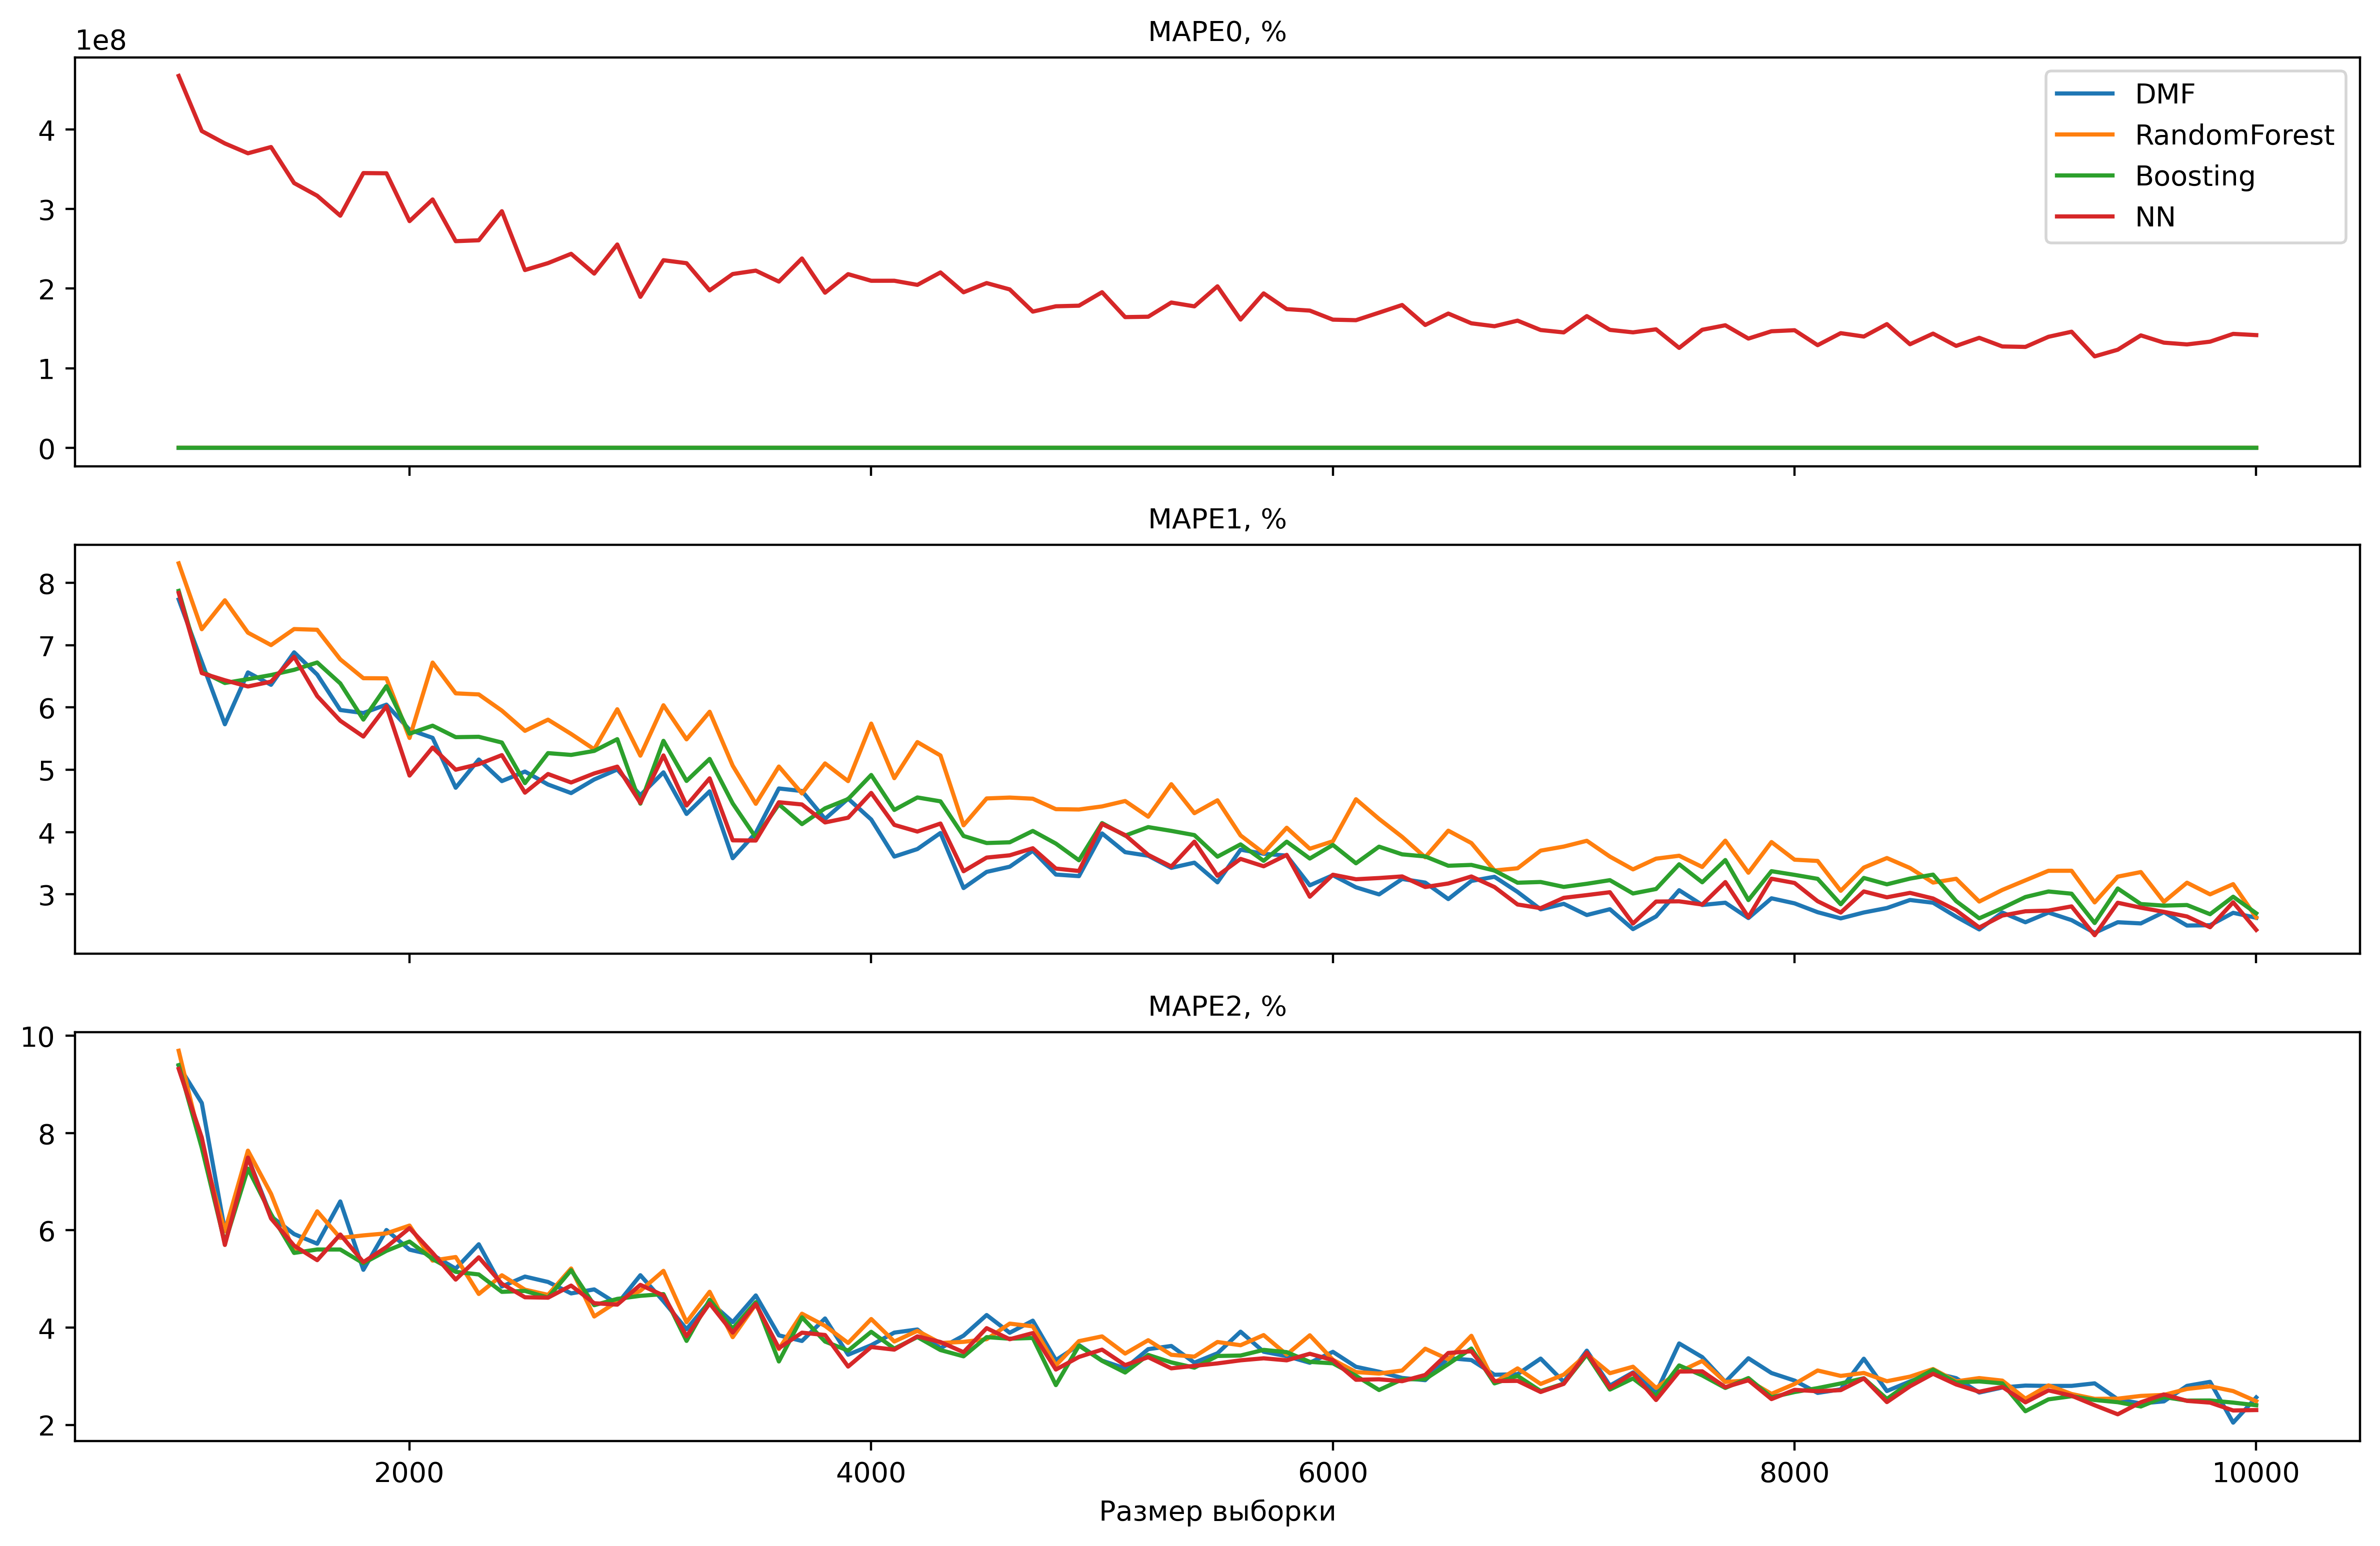

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 8

fig, axs = plt.subplots(3, 1, sharex=True, dpi=200)
fig.suptitle('', fontsize=16)

for i in range(3):
    axs[i].set_title(f"MAPE{i}, %", fontsize=10)
    #axs[i].plot(x, d1[:, i], label='OLS')
    axs[i].plot(x, d2[:, i], label='DMF')
    axs[i].plot(x, d4[:, i], label='RandomForest')
    axs[i].plot(x, d3[:, i], label='Boosting')
    axs[i].plot(x, d5[:, i], label='NN')
    
axs[0].legend()
axs[2].set_xlabel('Размер выборки')
plt.tight_layout()
plt.savefig('simulations_without_forest.pdf')